In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print("품사 태깅이 된 문장 개수 :", len(tagged_sentences))

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\sunho\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


품사 태깅이 된 문장 개수 : 3914


In [ ]:
print(tagged_sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [ ]:
sentences, pos_tags = [],[]
for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    pos_tags.append(list(tag_info))

In [ ]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


In [ ]:
print(sentences[8])
print(pos_tags[8])

['We', "'re", 'talking', 'about', 'years', 'ago', 'before', 'anyone', 'heard', 'of', 'asbestos', 'having', 'any', 'questionable', 'properties', '.']
['PRP', 'VBP', 'VBG', 'IN', 'NNS', 'IN', 'IN', 'NN', 'VBD', 'IN', 'NN', 'VBG', 'DT', 'JJ', 'NNS', '.']


샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


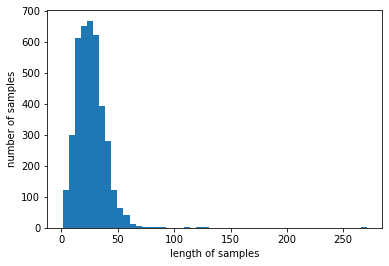

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' %(sum(map(len,sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def tokenize(samples):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(samples)
    return tokenizer

In [ ]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

In [ ]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [ ]:
print(X_train[:2])
print(y_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]
[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [ ]:
max_len = 150
X_train = pad_sequences(X_train,padding='post',maxlen=max_len)
y_train = pad_sequences(y_train,padding='post',maxlen=max_len)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=.2,random_state=777)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 150)
훈련 샘플 레이블의 크기 : (3131, 150)
테스트 샘플 문장의 크기 : (783, 150)
테스트 샘플 레이블의 크기 : (783, 150)


In [ ]:
X_train,y_train

(array([[   2,  147,   53, ...,    0,    0,    0],
        [  67,    1,   31, ...,    0,    0,    0],
        [  14, 2727,    6, ...,    0,    0,    0],
        ...,
        [ 290,    1,    6, ...,    0,    0,    0],
        [1313, 5399, 1476, ...,    0,    0,    0],
        [  18,    2,   88, ...,    0,    0,    0]]),
 array([[ 4,  1, 17, ...,  0,  0,  0],
        [12,  8,  3, ...,  0,  0,  0],
        [ 4, 17,  4, ...,  0,  0,  0],
        ...,
        [ 3,  8,  4, ...,  0,  0,  0],
        [ 1,  6, 20, ...,  0,  0,  0],
        [25,  4,  3, ...,  0,  0,  0]]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
25/25 [==============================] - 12s 140ms/step - loss: 0.5921 - accuracy: 0.1363 - val_loss: 0.5154 - val_accuracy: 0.1652
Epoch 2/7
25/25 [==============================] - 1s 27ms/step - loss: 0.5025 - accuracy: 0.1918 - val_loss: 0.4804 - val_accuracy: 0.2326
Epoch 3/7
25/25 [==============================] - 1s 27ms/step - loss: 0.4518 - accuracy: 0.3665 - val_loss: 0.3985 - val_accuracy: 0.4558
Epoch 4/7
25/25 [==============================] - 1s 28ms/step - loss: 0.3343 - accuracy: 0.5188 - val_loss: 0.2655 - val_accuracy: 0.6121
Epoch 5/7
25/25 [==============================] - 1s 28ms/step - loss: 0.2104 - accuracy: 0.7131 - val_loss: 0.1611 - val_accuracy: 0.7947
Epoch 6/7
25/25 [==============================] - 1s 29ms/step - loss: 0.1167 - accuracy: 0.8663 - val_loss: 0.0964 - val_accuracy: 0.8795
Epoch 7/7
25/25 [==============================] - 1s 28ms/step - loss: 0.0658 - accuracy: 0.9251 - val_loss: 0.0687 - val_accuracy: 0.9044


In [ ]:
print("\n 테스트 정확도: %.4f" %(model.evaluate(X_test,y_test)[1]))

25/25 [==============================] - 0s 7ms/step - loss: 0.0687 - accuracy: 0.9044

 테스트 정확도: 0.9044


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word
i = 10
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted,axis=-1)
print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35 * "-")
for word,tag,pred in zip(X_test[i],y_test[i],y_predicted[0]):
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_tag[tag].upper(),index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .


In [ ]:
import nltk
from nltk import word_tokenize,pos_tag,ne_chunk

sentence = "James is working at Disney in London"
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download("words")
ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sunho\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunho\AppData\Roaming\nltk_data...


(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


[nltk_data]   Unzipping corpora\words.zip.


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")

f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.

# 2022.7.3 기준 url사이트에서 404 Not Found로 파일 가져오기 불가능

"https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt" 으로 url 주소 변경

In [ ]:
print('전체 샘플 개수: ',len(tagged_sentences))

전체 샘플 개수:  14041


In [ ]:
print('첫번째 샘플 :',tagged_sentences[0])

첫번째 샘플 : [['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [ ]:
sentences,ner_tags = [],[]
for tagged_sentence in tagged_sentences:
    sentence,tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

In [ ]:
print('첫번째 샘플의 문장 :',sentences[0])
print('첫번째 샘플의 레이블 :',ner_tags[0])

첫번째 샘플의 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
첫번째 샘플의 레이블 : ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


In [ ]:
print(sentences[12])
print(ner_tags[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


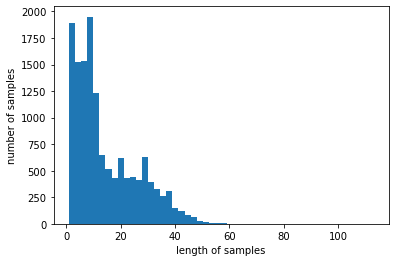

In [ ]:
print('샘플의 최대 길이 : %d' %max(len(sentence) for sentence in sentences))
print('샘플의 평균 길이 : %f' %(sum(map(len,sentences))/len(sentences)))
plt.hist([len(sentence) for sentence in sentences],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
vocab_size = 4000
src_tokenizer = Tokenizer(num_words=vocab_size,oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [ ]:
print('첫번째 샘플의 문장 :',X_train[0])
print('첫번재 샘플의 레이블 :',y_train[0])

첫번째 샘플의 문장 : [989, 1, 205, 629, 7, 3939, 216, 1, 3]
첫번재 샘플의 레이블 : [4, 1, 7, 1, 1, 1, 7, 1, 1]


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [ ]:
decoded = []
for index in X_train[0]:
    decoded.append(index_to_word[index])
print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [ ]:
max_len = 70
X_train = pad_sequences(X_train,padding='post', maxlen=max_len)
y_train = pad_sequences(y_train,padding='post', maxlen=max_len)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=.2,random_state=777)

In [ ]:
y_train = to_categorical(y_train,num_classes=tag_size)
y_test = to_categorical(y_test,num_classes=tag_size)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional,TimeDistributed
from tensorflow.keras.optimizers import Adam

embedding_dim= 128
hidden_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len,mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size,activation='softmax')))

model.compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=128,epochs=8,validation_data=(X_test,y_test))

Epoch 1/8
88/88 [==============================] - 15s 60ms/step - loss: 0.1991 - accuracy: 0.8224 - val_loss: 0.1308 - val_accuracy: 0.8332
Epoch 2/8
88/88 [==============================] - 2s 23ms/step - loss: 0.1064 - accuracy: 0.8473 - val_loss: 0.0848 - val_accuracy: 0.8726
Epoch 3/8
88/88 [==============================] - 2s 23ms/step - loss: 0.0757 - accuracy: 0.8914 - val_loss: 0.0623 - val_accuracy: 0.9114
Epoch 4/8
88/88 [==============================] - 2s 23ms/step - loss: 0.0539 - accuracy: 0.9253 - val_loss: 0.0453 - val_accuracy: 0.9362
Epoch 5/8
88/88 [==============================] - 2s 23ms/step - loss: 0.0396 - accuracy: 0.9445 - val_loss: 0.0387 - val_accuracy: 0.9467
Epoch 6/8
88/88 [==============================] - 2s 24ms/step - loss: 0.0319 - accuracy: 0.9547 - val_loss: 0.0341 - val_accuracy: 0.9516
Epoch 7/8
88/88 [==============================] - 2s 24ms/step - loss: 0.0269 - accuracy: 0.9619 - val_loss: 0.0323 - val_accuracy: 0.9555
Epoch 8/8
88/88 [==

In [ ]:
print("\n 테스트 정확도 : %.4f" % (model.evaluate(X_test,y_test)[1]))

88/88 [==============================] - 1s 7ms/step - loss: 0.0325 - accuracy: 0.9553

 테스트 정확도 : 0.9553


In [ ]:
i = 10
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted,axis=-1)
labels = np.argmax(y_test[i],-1)
print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35 * "-")

for word,tag,pred in zip(X_test[i],labels,y_predicted[0]):
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word],index_to_ner[tag].upper(),index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
pre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/ner_dataset.csv", filename="ner_dataset.csv")
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [3]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
print('데이터프레임 행의 개수 : {}'.format(len(data)))

데이터프레임 행의 개수 : 1048575


In [5]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True


In [6]:
print('어떤 열에 Null값이 있는지 출력')
print('=================================')
data.isnull().sum()

어떤 열에 Null값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [7]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [8]:
print("Tag  열의 각각의 값의 개수 카운트")
print("=======================================")
print(data.groupby('Tag').size().reset_index(name='count'))

Tag  열의 각각의 값의 개수 카운트
      Tag   count
0   B-art     402
1   B-eve     308
2   B-geo   37644
3   B-gpe   15870
4   B-nat     201
5   B-org   20143
6   B-per   16990
7   B-tim   20333
8   I-art     297
9   I-eve     253
10  I-geo    7414
11  I-gpe     198
12  I-nat      51
13  I-org   16784
14  I-per   17251
15  I-tim    6528
16      O  887908


In [9]:
data = data.fillna(method="ffill")
print(data.tail())

              Sentence #       Word  POS Tag
1048570  Sentence: 47959       they  PRP   O
1048571  Sentence: 47959  responded  VBD   O
1048572  Sentence: 47959         to   TO   O
1048573  Sentence: 47959        the   DT   O
1048574  Sentence: 47959     attack   NN   O


In [10]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [11]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 31817


In [12]:
print(data[:5])

    Sentence #           Word  POS Tag
0  Sentence: 1      thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O


In [13]:
func = lambda temp: [(w,t) for w,t in zip(temp['Word'].values.tolist(),temp["Tag"].values.tolist())]
tagged_sentences = [t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 개수 : {}".format(len(tagged_sentences)))

전체 샘플 개수 : 47959


In [14]:
print(tagged_sentences[0])

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [15]:
sentences,ner_tags = [],[]
for tagged_sentence in tagged_sentences:
    sentence,tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

In [16]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [17]:
print(sentences[98])
print(ner_tags[98])

['she', 'had', 'once', 'received', 'a', 'kidney', 'transplant', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.000000


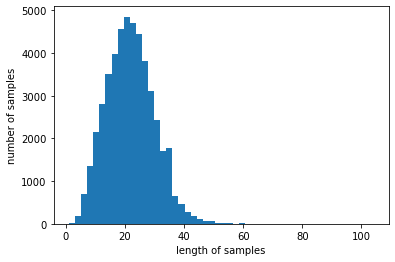

In [18]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f'%(sum(map(len,sentences))//len(sentences)))
plt.hist([len(s) for s in sentences], bins =50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
src_tokenizer = Tokenizer(oov_token="OOV")
tar_tokenizer = Tokenizer(lower=False)
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

In [20]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [21]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [22]:
X_data = src_tokenizer.texts_to_sequences(sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [23]:
print(X_data[0])
print(y_data[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [24]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [25]:
decoded = []
for index in X_data[0]:
    decoded.append(index_to_word[index])
print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [26]:
max_len = 70
X_data = pad_sequences(X_data,padding='post',maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [27]:
X_train,X_test,y_train_int,y_test_int = train_test_split(X_data,y_data,test_size=.2,random_state=777)

In [28]:
y_train = to_categorical(y_train_int,num_classes=tag_size)
y_test = to_categorical(y_test_int,num_classes=tag_size)

In [29]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('테스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블(정수 인코딩)의 크기 : (38367, 70)
훈련 샘플 레이블(원-핫 인코딩)의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블(정수 인코딩)의 크기 : (9592, 70)
테스트 샘플 레이블(원-핫 인코딩)의 크기 : (9592, 70, 18)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,InputLayer,Bidirectional,TimeDistributed,Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim =128
hidden_units = 256
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units,return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size,activation=('softmax'))))
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=128,epochs=6,validation_split=0.1)

Epoch 1/6
270/270 [==============================] - 22s 40ms/step - loss: 0.1707 - accuracy: 0.8773 - val_loss: 0.0762 - val_accuracy: 0.9323
Epoch 2/6
270/270 [==============================] - 7s 28ms/step - loss: 0.0533 - accuracy: 0.9510 - val_loss: 0.0479 - val_accuracy: 0.9540
Epoch 3/6
270/270 [==============================] - 7s 28ms/step - loss: 0.0367 - accuracy: 0.9649 - val_loss: 0.0442 - val_accuracy: 0.9565
Epoch 4/6
270/270 [==============================] - 7s 27ms/step - loss: 0.0298 - accuracy: 0.9706 - val_loss: 0.0426 - val_accuracy: 0.9586
Epoch 5/6
270/270 [==============================] - 8s 28ms/step - loss: 0.0257 - accuracy: 0.9740 - val_loss: 0.0439 - val_accuracy: 0.9581
Epoch 6/6
270/270 [==============================] - 7s 27ms/step - loss: 0.0227 - accuracy: 0.9767 - val_loss: 0.0444 - val_accuracy: 0.9593


In [31]:
i = 13
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted,axis=-1)
labels = np.argmax(y_test[i], -1)
print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35 * "-")
for word,tag,pred in zip(X_test[i],labels, y_predicted[0]):
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word],index_to_ner[tag],index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [32]:
labels = ['B-PER', 'I-PER', 'O', 'O', 'B-MISC', 'O','O','O','O','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O','O','B-MISC','I-MISC','I-MISC','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O']
predicted = ['O'] * len(labels) 
print('예측값 :',predicted)

예측값 : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [33]:
hit = 0
for tag,pred in zip(labels,predicted):
    if tag == pred:
        hit +=1
accuracy = hit/len(labels)
print('정확도 : {:.1%}'.format(accuracy))

정확도 : 74.4%


In [34]:
pip install seqeval

Note: you may need to restart the kernel to use updated packages.


In [35]:
from seqeval.metrics import classification_report
print(classification_report([labels],[predicted]))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         2
         PER       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00         5
   macro avg       0.00      0.00      0.00         5
weighted avg       0.00      0.00      0.00         5



C:\Users\sunho\anaconda3\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sunho\anaconda3\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
labels = ['B-PER', 'I-PER', 'O', 'O', 'B-MISC', 'O','O','O','O','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O','O','B-MISC','I-MISC','I-MISC','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O']
predicted = ['B-PER', 'I-PER', 'O', 'O', 'B-MISC', 'O','O','O','O','O','O','O','O','O','O','B-PER','I-PER','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O','O']
print(classification_report([labels], [predicted]))

              precision    recall  f1-score   support

        MISC       1.00      0.50      0.67         2
         PER       1.00      0.67      0.80         3

   micro avg       1.00      0.60      0.75         5
   macro avg       1.00      0.58      0.73         5
weighted avg       1.00      0.60      0.75         5



In [37]:
from seqeval.metrics import f1_score,classification_report

def sequences_to_tag(sequences):
    result = []
    for sequence in sequences:
        word_sequence = []
        for pred in sequence:
            pred_index = np.argmax(pred)
            word_sequence.append(index_to_ner[pred_index].replace("PAD","O"))
        result.append(word_sequence)
    return result
y_predicted = model.predict([X_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)
print("F1 score: {:.1%}".format(f1_score(test_tags,pred_tags)))
print(classification_report(test_tags,pred_tags))

F1 score: 79.0%
              precision    recall  f1-score   support

         art       0.22      0.03      0.06        63
         eve       0.67      0.27      0.38        52
         geo       0.82      0.85      0.84      7620
         gpe       0.96      0.94      0.95      3145
         nat       0.60      0.24      0.35        37
         org       0.61      0.55      0.58      4033
         per       0.72      0.71      0.72      3545
         tim       0.87      0.84      0.85      4067

   micro avg       0.80      0.78      0.79     22562
   macro avg       0.68      0.56      0.59     22562
weighted avg       0.79      0.78      0.79     22562



In [38]:
pip install keras-crf

Note: you may need to restart the kernel to use updated packages.


In [39]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel
from seqeval.metrics import f1_score, classification_report

embedding_dim = 128
hidden_units = 64
dropout_ratio = 0.3

sequence_input = Input(shape=(max_len,),dtype=tf.int32, name='sequence_input')

model_embedding = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len)(sequence_input)

model_bilstm = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(dropout_ratio))(model_bilstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = Model(inputs=sequence_input, outputs=model_dense)
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9222 - loss: 26.6423
Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.95921, saving model to bilstm_crf\cp.ckpt
270/270 [==============================] - 68s 227ms/step - decode_sequence_accuracy: 0.9222 - loss: 26.5859 - val_decode_sequence_accuracy: 0.9592 - val_loss: 10.5842
Epoch 2/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9687 - loss: 7.0065
Epoch 00002: val_decode_sequence_accuracy improved from 0.95921 to 0.97855, saving model to bilstm_crf\cp.ckpt
270/270 [==============================] - 61s 225ms/step - decode_sequence_accuracy: 0.9687 - loss: 6.9966 - val_decode_sequence_accuracy: 0.9786 - val_loss: 5.0467
Epoch 3/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9813 - loss: 3.7913
Epoch 00003: val_decode_sequence_accuracy improved from 0.97855 to 0.98284, saving model to bilstm_crf\cp.ckpt

In [41]:
model.load_weights('bilstm_crf/cp.ckpt')
i = 13
y_predicted = model.predict(np.array([X_test[i]]))[0]
labels = np.argmax(y_test[i],-1)
print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35 * "-")

for word,tag,pred in zip(X_test[i],labels,y_predicted[0]):
  if word != 0:
    print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [42]:
y_predicted = model.predict(X_test)[0]

In [43]:
print(y_predicted[:2])

[[ 1  3 10  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  3  1  1  1  1  1  1  1  2  2  9  1  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [44]:
def sequences_to_tag_for_crf(sequences):
  result = []
  for sequence in sequences:
    word_sequence = []
    for pred_index in sequence:
      word_sequence.append(index_to_ner[pred_index].replace("PAD","O"))
    result.append(word_sequence)
  return result

pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 79.7%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00        63
         eve       1.00      0.02      0.04        52
         geo       0.82      0.85      0.84      7620
         gpe       0.96      0.94      0.95      3145
         nat       0.43      0.16      0.24        37
         org       0.68      0.55      0.61      4033
         per       0.75      0.70      0.72      3545
         tim       0.88      0.83      0.85      4067

   micro avg       0.82      0.78      0.80     22562
   macro avg       0.69      0.51      0.53     22562
weighted avg       0.81      0.78      0.79     22562



In [45]:
words = list(set(data["Word"].values))
chars = set([w_i for w in words for w_i in w])
chars = sorted(list(chars))
print('문자 집합 :',chars)

문자 집합 : ['!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '\x85', '\x91', '\x92', '\x93', '\x94', '\x96', '\x97', '\xa0', '°', 'é', 'ë', 'ö', 'ü']


In [46]:
char_to_index = {c: i+2 for i,c in enumerate(chars)}
char_to_index["OOV"] = 1
char_to_index["PAD"] = 0
index_to_char = {}
for key, value in char_to_index.items():
  index_to_char[value] = key

In [47]:
max_len_char = 15
def padding_char_indice(char_indice,max_len_char):
  return pad_sequences(char_indice,maxlen=max_len_char, padding='post',value =0)
def integer_coding(sentences):
  char_data = []
  for ts in sentences:
    word_indice = [word_to_index[t] for t in ts]
    char_indice = [[char_to_index[char] for char in t]
                   for t in ts]
    char_indice = padding_char_indice(char_indice,max_len_char)

    for chars_of_token in char_indice:
      if len(chars_of_token) > max_len_char:
        continue
    char_data.append(char_indice)
  return char_data
X_char_data = integer_coding(sentences)

In [48]:
print("기존 문장 :",sentences[0])

기존 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [49]:
print('문자 단위 정수 인코딩 :')
print(X_char_data[0])

문자 단위 정수 인코딩 :
[[53 41 48 54 52 34 47 37 52  0  0  0  0  0  0]
 [48 39  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [37 38 46 48 47 52 53 51 34 53 48 51 52  0  0]
 [41 34 55 38  0  0  0  0  0  0  0  0  0  0  0]
 [46 34 51 36 41 38 37  0  0  0  0  0  0  0  0]
 [53 41 51 48 54 40 41  0  0  0  0  0  0  0  0]
 [45 48 47 37 48 47  0  0  0  0  0  0  0  0  0]
 [53 48  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [49 51 48 53 38 52 53  0  0  0  0  0  0  0  0]
 [53 41 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [56 34 51  0  0  0  0  0  0  0  0  0  0  0  0]
 [42 47  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [42 51 34 50  0  0  0  0  0  0  0  0  0  0  0]
 [34 47 37  0  0  0  0  0  0  0  0  0  0  0  0]
 [37 38 46 34 47 37  0  0  0  0  0  0  0  0  0]
 [53 41 38  0  0  0  0  0  0  0  0  0  0  0  0]
 [56 42 53 41 37 51 34 56 34 45  0  0  0  0  0]
 [48 39  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [35 51 42 53 42 52 41  0  0  0  0  0  0  0  0]
 [53 51 48 48 49 52  0  0  0  0  0  0  0  0  0]
 [39 51 48 46  0  0  0  0

In [50]:
X_char_data = pad_sequences(X_char_data,maxlen=max_len,padding='post',value = 0)

In [51]:
X_char_train,X_char_test,_,_ = train_test_split(X_char_data,y_data,test_size=.2,random_state=777)
X_char_train = np.array(X_char_train)
X_char_test = np.array(X_char_test)

In [52]:
print(X_train[0])

[ 150  928  361   17 2624    9 4131 3567    9    8 2893 1250  880  107
    3    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [53]:
print(index_to_word[150])

soldiers


In [54]:
print(' '.join([index_to_char[index] for index in X_char_train[0][0]]))

s o l d i e r s PAD PAD PAD PAD PAD PAD PAD


In [55]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('훈련 샘플 char 데이터의 크기 : {}'.format(X_char_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
훈련 샘플 char 데이터의 크기 : (38367, 70, 15)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, TimeDistributed, Dropout, concatenate, Bidirectional, LSTM, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import Model
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from seqeval.metrics import f1_score, classification_report
from keras_crf import CRFModel

embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.5
hidden_units = 256
num_filters  = 30
kernel_size = 3

word_ids = Input(shape=(None,),dtype='int32', name='words_input')
word_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_ids)

char_ids = Input(shape=(None, max_len_char,), name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), char_embedding_dim, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

conv1d_out = TimeDistributed(Conv1D(kernel_size=kernel_size, filters=num_filters, padding='same', activation='tanh', strides=1))(dropout)
maxpool_out = TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)

output = concatenate([word_embeddings, char_embeddings])

output = Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio))(output)

output = TimeDistributed(Dense(tag_size, activation='softmax'))(output)

model = Model(inputs=[word_ids, char_ids], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='nadam',  metrics=['acc'])

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit([X_train, X_char_train], y_train, batch_size=128, epochs=15, validation_split=0.1, verbose=1, callbacks=[es, mc])

Epoch 1/15
270/270 [==============================] - ETA: 0s - loss: 0.2023 - acc: 0.9498
Epoch 00001: val_acc improved from -inf to 0.97531, saving model to bilstm_cnn.h5
270/270 [==============================] - 25s 61ms/step - loss: 0.2023 - acc: 0.9498 - val_loss: 0.0875 - val_acc: 0.9753
Epoch 2/15
269/270 [============================>.] - ETA: 0s - loss: 0.0637 - acc: 0.9819
Epoch 00002: val_acc improved from 0.97531 to 0.98474, saving model to bilstm_cnn.h5
270/270 [==============================] - 15s 57ms/step - loss: 0.0636 - acc: 0.9819 - val_loss: 0.0518 - val_acc: 0.9847
Epoch 3/15
269/270 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9868
Epoch 00003: val_acc improved from 0.98474 to 0.98619, saving model to bilstm_cnn.h5
270/270 [==============================] - 15s 56ms/step - loss: 0.0450 - acc: 0.9868 - val_loss: 0.0449 - val_acc: 0.9862
Epoch 4/15
269/270 [============================>.] - ETA: 0s - loss: 0.0377 - acc: 0.9888
Epoch 00004: va

In [58]:
model = load_model('bilstm_cnn.h5')
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])
y_predicted = np.argmax(y_predicted, axis=-1)
labels = np.argmax(y_test[i], -1)
print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")
for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [59]:
y_predicted = model.predict([X_test, X_char_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 79.2%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00        63
         eve       0.46      0.25      0.33        52
         geo       0.85      0.84      0.84      7620
         gpe       0.94      0.95      0.95      3145
         nat       0.60      0.08      0.14        37
         org       0.59      0.60      0.59      4033
         per       0.73      0.74      0.73      3545
         tim       0.85      0.85      0.85      4067

   micro avg       0.79      0.79      0.79     22562
   macro avg       0.63      0.54      0.55     22562
weighted avg       0.79      0.79      0.79     22562



In [60]:
embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.5
hidden_units = 256
num_filters = 30
kernel_size = 3

word_ids = Input(shape=(None,),dtype='int32', name='words_input')
word_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_ids)

char_ids = Input(shape=(None, max_len_char,), name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), char_embedding_dim, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

conv1d_out = TimeDistributed(Conv1D(kernel_size=kernel_size, filters=num_filters, padding='same',activation='tanh', strides=1))(dropout)
maxpool_out=TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)

output = concatenate([word_embeddings, char_embeddings])
output = Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio))(output)
output = TimeDistributed(Dense(tag_size, activation='relu'))(output)

base = Model(inputs=[word_ids, char_ids], outputs=[output])
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_cnn_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [61]:
history = model.fit([X_train, X_char_train], y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9355 - loss: 20.0894
Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.96928, saving model to bilstm_cnn_crf\cp.ckpt
270/270 [==============================] - 78s 265ms/step - decode_sequence_accuracy: 0.9355 - loss: 20.0476 - val_decode_sequence_accuracy: 0.9693 - val_loss: 7.6367
Epoch 2/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9790 - loss: 4.8111
Epoch 00002: val_decode_sequence_accuracy improved from 0.96928 to 0.98223, saving model to bilstm_cnn_crf\cp.ckpt
270/270 [==============================] - 70s 260ms/step - decode_sequence_accuracy: 0.9790 - loss: 4.8040 - val_decode_sequence_accuracy: 0.9822 - val_loss: 4.0373
Epoch 3/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9861 - loss: 2.9234
Epoch 00003: val_decode_sequence_accuracy improved from 0.98223 to 0.98557, saving model to bilstm_cnn_

In [62]:
model.load_weights('bilstm_cnn_crf/cp.ckpt')

i = 13
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])[0] 
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: 
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [63]:
y_predicted = model.predict([X_test, X_char_test])[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 80.7%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00        63
         eve       0.70      0.27      0.39        52
         geo       0.84      0.85      0.84      7620
         gpe       0.94      0.94      0.94      3145
         nat       1.00      0.03      0.05        37
         org       0.66      0.58      0.62      4033
         per       0.78      0.75      0.76      3545
         tim       0.85      0.86      0.86      4067

   micro avg       0.82      0.79      0.81     22562
   macro avg       0.72      0.53      0.56     22562
weighted avg       0.81      0.79      0.80     22562



In [64]:
embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.3
hidden_units = 64

word_ids = Input(batch_shape=(None, None), dtype='int32', name='word_input')
word_embeddings = Embedding(input_dim=vocab_size,
                                        output_dim=embedding_dim,
                                        name='word_embedding')(word_ids)
char_ids = Input(batch_shape=(None, None, None), dtype='int32', name='char_input')
char_embeddings = Embedding(input_dim=(len(char_to_index)),
                                        output_dim=char_embedding_dim,
                                        embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5),
                                        name='char_embedding')(char_ids)
char_embeddings = TimeDistributed(Bidirectional(LSTM(hidden_units)))(char_embeddings)
output = concatenate([word_embeddings, char_embeddings])
output = Dropout(dropout_ratio)(output)
output = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(output)

output = TimeDistributed(Dense(tag_size, activation='relu'))(output)

base = Model(inputs=[word_ids, char_ids], outputs=[output])
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

history = model.fit([X_train, X_char_train], y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9268 - loss: 25.6905
Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.96746, saving model to bilstm_bilstm_crf\cp.ckpt
270/270 [==============================] - 85s 277ms/step - decode_sequence_accuracy: 0.9268 - loss: 25.6263 - val_decode_sequence_accuracy: 0.9675 - val_loss: 8.0370
Epoch 2/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9787 - loss: 5.1713
Epoch 00002: val_decode_sequence_accuracy improved from 0.96746 to 0.98309, saving model to bilstm_bilstm_crf\cp.ckpt
270/270 [==============================] - 72s 268ms/step - decode_sequence_accuracy: 0.9787 - loss: 5.1683 - val_decode_sequence_accuracy: 0.9831 - val_loss: 3.7821
Epoch 3/15
270/270 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.9863 - loss: 2.9636
Epoch 00003: val_decode_sequence_accuracy improved from 0.98309 to 0.98557, saving model to bilst

In [65]:
model.load_weights('bilstm_bilstm_crf/cp.ckpt')

i = 13
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])[0]
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0:
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


In [66]:
y_predicted = model.predict([X_test, X_char_test])[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 80.7%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00        63
         eve       0.87      0.25      0.39        52
         geo       0.81      0.88      0.84      7620
         gpe       0.95      0.94      0.95      3145
         nat       0.00      0.00      0.00        37
         org       0.70      0.55      0.61      4033
         per       0.77      0.75      0.76      3545
         tim       0.84      0.85      0.85      4067

   micro avg       0.81      0.80      0.81     22562
   macro avg       0.62      0.53      0.55     22562
weighted avg       0.81      0.80      0.80     22562

